In [28]:
import numpy as np 

from scipy.integrate import solve_ivp

import matplotlib as mpl
import matplotlib.pyplot as plt 

from haar import haar as haar1

mpl.style.use('seaborn')

/tmp/ipykernel_168771/2263815618.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn')


In [49]:
import numpy as np

def haar(x, i, J):
    if i == 1:
        m = k = 0
    else:
        IMat = np.zeros([J+1, 2**J])
        IMask = np.zeros([J+1, 2**J])

        ind_s = 1
        for ind_j in range(J+1):
            for ind_i in range(2**ind_j):
                ind_s += 1
                IMask[ind_j, ind_i] = ind_s
                IMat[ind_j, ind_i] = ind_i+ind_j+1

        ind_j, ind_i = np.where(IMask == i)
        m = 2**ind_j
        k = ind_i

    #y = np.zeros([1, len(x)])
    y = np.zeros([len(x), 1])


    if i == 1:
        for j in range(len(x)):
            if 0 <= x[j] < 1:
                y[j, 0] = 1 
                #y[0, j] = 1
            else:
                y[j, 0] = 0
                #y[0, j] = 0
    else:
        alpha = k / m
        beta = (k + 0.5) / m
        gamma = (k + 1) / m
        print(f'a: {alpha}\n')
        print(f'b: {beta}\n')
        print(f'g: {gamma}\n')
        for j in range(len(x)):
            if alpha <= x[j] < beta:
                y[j, 0] = 1 
                #y[0, j] = 1
            elif beta <= x[j] < gamma:
                y[j, 0] = -1
                #y[0, j] = -1
            else:
                y[j, 0] = 0
                #y[0, j] = 0

    return y

In [4]:
def pi1(x, i, J): 
    if i == 1: 
        m = k = 0
    else: 
        IMat = np.zeros([J+1, 2**J])
        IMask = np.zeros([J+1, 2**J])

        ind_s = 1 

        for ind_j in range(J+1): 
            for ind_i in range(2**ind_j):
                ind_s +=1 
                IMask[ind_j, ind_i] = ind_s
                IMat[ind_j, ind_i] = ind_i + ind_j+1

        m, k = np.where(IMask == i) 
        m = 2**m 

    y = np.zeros([1, len(x)])

    if i == 1: 
        for i in range(len(x)): 
            if 0 <= x[i] < 1: 
                y[0, i] = x[i]
            else: 
                y[0, i] = 0 

    else: 
        alpha = k/m
        beta  = (k+0.5)/m 
        gamma = (k+1)/m

        for i in range(len(x)): 
            if alpha <= x[i] < beta: 
                y[0, i] = x[i] - alpha 
            elif beta <= x[i] < gamma: 
                y[0, i] = gamma - x[i]
            else: 
                y[0, i] = 0 

    return y

In [5]:
def pi2(x, i, J): 
    if i == 1: 
        m = k = 0
    else: 
        IMat = np.zeros([J+1, 2**J])
        IMask = np.zeros([J+1, 2**J])

        ind_s = 1

        for ind_j in range(J+1): 
            for ind_i in range(2**ind_j): 
                ind_s += 1 
                IMask[ind_j, ind_i] = ind_s
                IMat[ind_j, ind_i] = ind_i + ind_j + 1 

        m, k = np.where(IMask == i) 
        m = 2**m 


    y = np.zeros([1, len(x)])

    if i == 1: 
        for i in range(len(x)): 
            if 0 <= x[i] < 1: 
                y[0, i] = 0.5 * x[i]**2 
            else: 
                y[0, i] = 0 
    else: 
        alpha = k/m
        beta  = (k+0.5)/m 
        gamma = (k+1)/m

        for i in range(len(x)): 
            if alpha <= x[i] < beta: 
                y[0, i] = 0.5 * (x[i] - alpha)**2 
            elif beta <= x[i] < gamma: 
                y[0, i] = 1 / (4 * m**2) - 0.5 * (gamma - x[i]) ** 2 
            elif gamma <= x[i] < 1 : 
                y[0, i] = 1 / (4 * m**2) 
            else: 
                y[0, i] = 0


    return y 

In [56]:
def haar(x, i, J):
    if i == 1:
        m = k = 0
    else:
        IMat = np.zeros([J+1, 2**J])
        IMask = np.zeros([J+1, 2**J])

        ind_s = 1
        for ind_j in range(J+1):
            for ind_i in range(2**ind_j):
                ind_s += 1
                IMask[ind_j, ind_i] = ind_s
                IMat[ind_j, ind_i] = ind_i+ind_j+1

        ind_j, ind_i = np.where(IMask == i)
        m = 2**ind_j
        k = ind_i

    
    #y = np.zeros([1, len(x)])
    y = np.zeros((len(x), ))
    

    # TODO: vectorize setting these 
    if i == 1:
        for j in range(len(x)):
            if 0 <= x[j] < 1:
                y[j] = 1
                #y[j, 0] = 1
                #y[0, j] = 1
            else:
                y[j] = 0
                #y[j, 0] = 0
                #y[0, j] = 0
    else:
        alpha = k / m
        beta = (k + 0.5) / m
        gamma = (k + 1) / m

        for j in range(len(x)):
            if alpha <= x[j] < beta:
                y[j] = 1
                #y[j, 0] = 1
                #y[0, j] = 1
            elif beta <= x[j] < gamma:
                y[j] = -1
                #y[j, 0] = -1
                #y[0, j] = -1
            else:
                y[j] = 0
                #y[j, 0] = 0
                #y[0, j] = 0

    return y #, m, k

In [50]:
J = 3 
N = 2**(J + 1) 
j = np.arange(0, N)
x = (j - 0.5) / N

haar1(x, 1, J).shape

(1, 16)

In [42]:
x.shape

(16,)

In [57]:
J = 3 
N = 2**(J + 1) 
j = np.arange(0, N)
x = (j - 0.5) / N

haar(x, 3, J).shape

(16,)

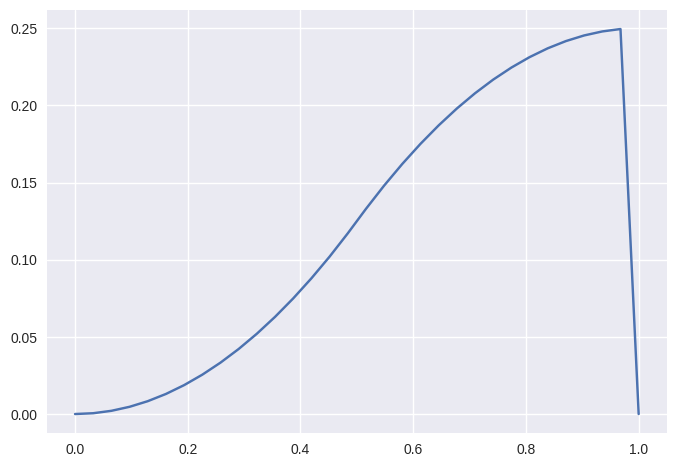

In [6]:
x = np.linspace(0, 1, 32)
J = 3 
i = 2

y = pi2(x, i, J)

plt.plot(x, y.ravel())

In [22]:
x = np.linspace(0, 1, 32)
J = 3 
i = 2

y = haar(x, i, J)

plt.plot(x, y.ravel())

[0.] [0.5] [1.]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [20]:
y.ravel()

array([0.        , 0.03225806, 0.06451613, 0.09677419, 0.12903226,
       0.16129032, 0.19354839, 0.22580645, 0.25806452, 0.29032258,
       0.32258065, 0.35483871, 0.38709677, 0.41935484, 0.4516129 ,
       0.48387097, 0.51612903, 0.5483871 , 0.58064516, 0.61290323,
       0.64516129, 0.67741935, 0.70967742, 0.74193548, 0.77419355,
       0.80645161, 0.83870968, 0.87096774, 0.90322581, 0.93548387,
       0.96774194, 0.        ])

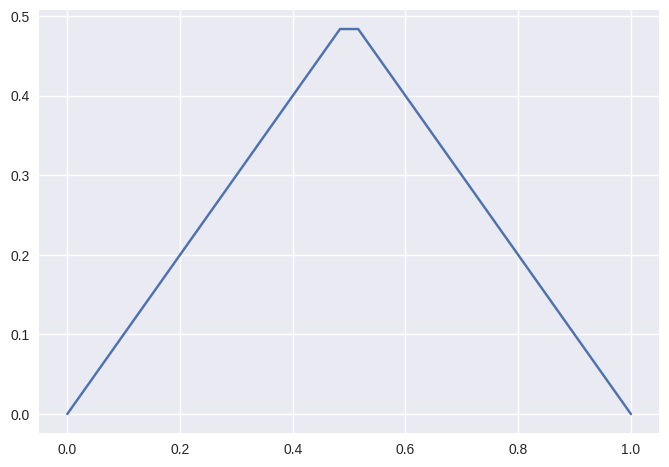

In [23]:
x = np.linspace(0, 1, 32)
J = 3 
i = 2

y = pi1(x, i, J)

plt.plot(x, y.ravel())

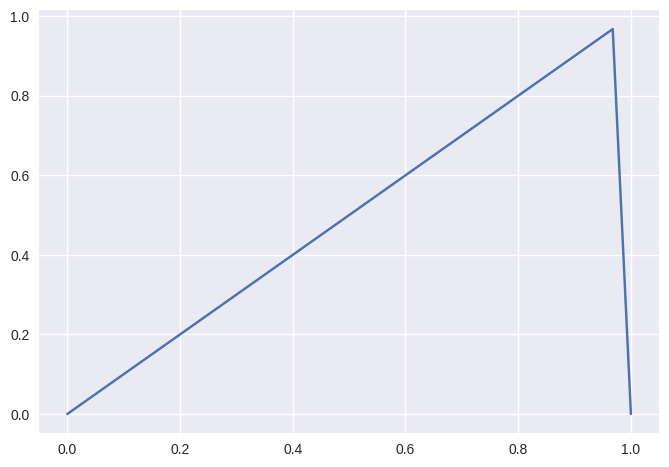

In [10]:
x = np.linspace(0, 1, 32)
J = 4 
i = 1

y = pi1(x, i, J)

plt.plot(x, y.ravel())

In [11]:
pi1([0.5], 1, 3)

array([[0.5]])

In [12]:
pi1([0.99], 2, 6)

array([[0.01]])

In [13]:
pi1([0.1, 0.25, 0.5, 0.75, 0.9], 6, 4)

array([[0., 0., 0., 0., 0.]])

In [14]:
haar([0.99], 2, 6) # + 

a: [0.]

b: [0.5]

g: [1.]



array([[-1.]])

In [15]:
haar([0.5], 1, 3) # + 

array([[1.]])

In [16]:
haar([0.1], 6, 4)

a: [0.25]

b: [0.375]

g: [0.5]



array([[0.]])

In [17]:
haar([0.1, 0.25, 0.5, 0.75, 0.9], 6, 4)

a: [0.25]

b: [0.375]

g: [0.5]



array([[0., 1., 0., 0., 0.]])

In [18]:
def haar(x, i, J): 
    if i == 1:  
        m = k = 0 
    else: 
        IMat = np.zeros((J+1, 2**J))
        IMask = IMat 

        ind_s = 1
        for ind_j in range(0, J): 
            for ind_i in range(0, 2**ind_j): 
                ind_s += 1
                IMask[ind_j, ind_i] = ind_s 
                IMat[ind_j, ind_i] = ind_i + ind_j + 1 

        (ind_j, ind_i) = np.where(IMask == i)
        m = 2**(ind_j - 1) 
        k = ind_i 

    y = 0

    if i == 1: 
        #for i in range(len(x)): 
        if 0 <= x < 1: 
            y = 1 
        else: 
            y = 0 

    else: 
        alpha = k / m 
        beta = (k + 0.5) / m 
        gamma = (k + 1) / m 

        print(alpha, beta, gamma)

        #for i in range(len(x)): 
        if alpha <= x < beta: 
            y = 1 
        elif beta <= x < gamma: 
            y = -1
        else: 
            y = 0 

    return y,m,k
    

In [19]:
haar([0.1, 0.25, 0.5, 0.75, 0.9], 6, 4)

[1.5 0.5] [1.75  0.625] [2.   0.75]


ValueError: operands could not be broadcast together with shapes (2,) (5,) 

In [ ]:
J = 3 
N = 2**(J + 1) 
j = np.arange(0, N)
x = (j - 0.5) / N

alpha1 = 0.
beta1 = -1.
a1 = beta1 - alpha1 

W =  np.zeros((N, N)) 
f = np.zeros((N, 1)) 
a = np.zeros((N, 1))

eps = 1.e-4
r = np.ones((N, 1))

iter_idx = 0 

while max(r) > eps: 
    for j in range(N): 
        H = P1 = P2 = 0 
        for i in range(N): 
            H += a[i] * haar
            

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])